In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#Load the data
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

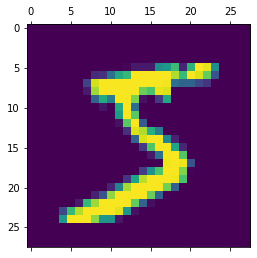

In [4]:
plt.matshow(X_train[0])

In [5]:
#scale the data
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
#create and compile the model
cnn = models.Sequential([
    layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=14, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
#train the model
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3963 - accuracy: 0.8822
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0592 - accuracy: 0.9810
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0388 - accuracy: 0.9871
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0305 - accuracy: 0.9909
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0224 - accuracy: 0.9927


In [10]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0347 - accuracy: 0.9896


[0.03472874313592911, 0.9896000027656555]

In [11]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.61851491e-08, 1.05615960e-08, 2.97270799e-06, 1.24518252e-07,
        2.70852701e-10, 6.69966915e-10, 1.00082847e-14, 9.99995947e-01,
        2.60783004e-08, 9.39115296e-07],
       [4.26170936e-06, 3.79152169e-07, 9.99987364e-01, 6.66291588e-12,
        4.99339979e-11, 1.41783753e-12, 2.36900860e-07, 9.21834007e-13,
        7.69289454e-06, 1.04193884e-11],
       [9.89236471e-10, 9.99997377e-01, 1.19824065e-07, 8.01205560e-11,
        1.22882989e-06, 2.79382295e-09, 1.36981448e-08, 1.17071170e-06,
        5.20138457e-08, 8.88310492e-09],
       [9.99973774e-01, 7.77510001e-12, 3.51532081e-10, 3.93518063e-09,
        2.14390644e-10, 4.53362588e-07, 2.53979415e-05, 1.55979293e-07,
        1.58696778e-07, 3.28521566e-08],
       [4.83242786e-07, 2.64746736e-09, 3.57003893e-09, 2.10034345e-09,
        9.99860764e-01, 1.44314598e-07, 1.15456125e-08, 3.43354962e-08,
        1.19219067e-06, 1.37449650e-04]], dtype=float32)

In [12]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[7, 2, 1, 0, 4]

In [13]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

NameError: name 'y_predicted' is not defined